# Chocolate Bar Ratings


Với data được cho, ta sẽ explore the features, data cleaning sau đó sử dụng hồi quy tuyến tính để dự đoán điểm rating khi có phần trăm cacao trong socola.

Những thứ muốn biết:...

# # Load packages and data

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("chocolate.csv")
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Rename the columns

In [4]:
data.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [5]:
new_columns = new_names = {
     data.columns[0]: 'company',
    'Specific Bean Origin\nor Bar Name': 'bar_origin',
    'REF': 'review_update_value',
    'Review\nDate': 'review_pub_date',
    'Cocoa\nPercent': 'cocoa_percentage',
    'Company\nLocation': 'company_location',
    'Rating': 'rating',
    'Bean\nType': 'bean_type',
    'Broad Bean\nOrigin': 'bean_origin'
}
data = data.rename(new_names, axis='columns')

In [7]:
##check data columns
data.head()

,company,bar_origin,review_update_value,review_pub_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


## Cleaning up the data

In [8]:
# transform cocoa_percentage
def trans_per(l):
    fractions = l.split("%")      
    return np.float32(fractions[0])
data.cocoa_percentage = data.cocoa_percentage.apply(lambda l: trans_per(l))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1795 non-null   object 
 1   bar_origin           1795 non-null   object 
 2   review_update_value  1795 non-null   int64  
 3   review_pub_date      1795 non-null   int64  
 4   cocoa_percentage     1795 non-null   float64
 5   company_location     1795 non-null   object 
 6   rating               1795 non-null   float64
 7   bean_type            1794 non-null   object 
 8   bean_origin          1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [10]:
data.rating = data.rating.apply(pd.to_numeric)

In [11]:
data.head()

,company,bar_origin,review_update_value,review_pub_date,cocoa_percentage,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


## Explore the features

Text(0.5, 1.0, 'Which rating counts are most common?')

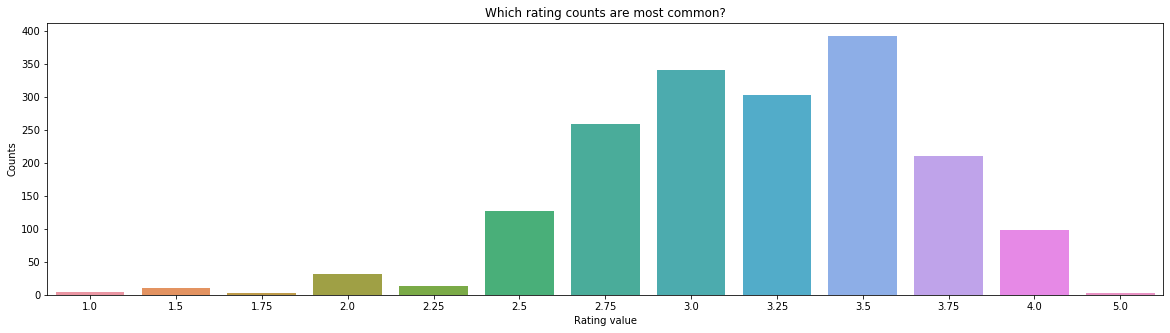

In [12]:
#chocolate rating
rating_counts = data['rating'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, )
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Which rating counts are most common?")

In [15]:
#Where do the beans come from? 
len(data.bean_origin.unique())

101

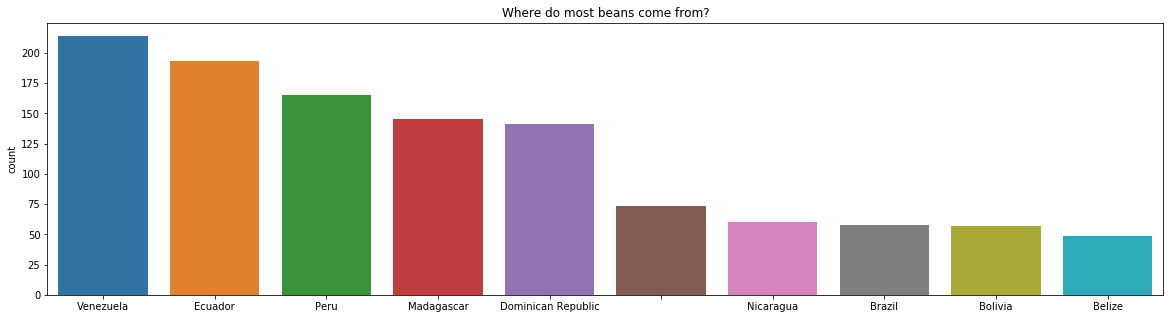

In [16]:
top_counts = data.bean_origin.value_counts().head(10)
sparse_counts = data.bean_origin.value_counts().tail(10)

plt.figure(figsize=(20,5))
sns.barplot(x=top_counts.index, y=top_counts.values)
plt.title("Where do most beans come from?")
plt.ylabel("count");

In [22]:
top_bean_origins = data.bean_origin.value_counts().head(20)
data.loc[data.bean_origin.isin(top_bean_origins.index),:].shape[0] / data.shape[0] * 100

83.50974930362118

Top 10 bean_origin cover around 83,5 % of the data

## rating and coacao_per

Text(0.5, 1.0, 'Distribution of cocao percentage ')

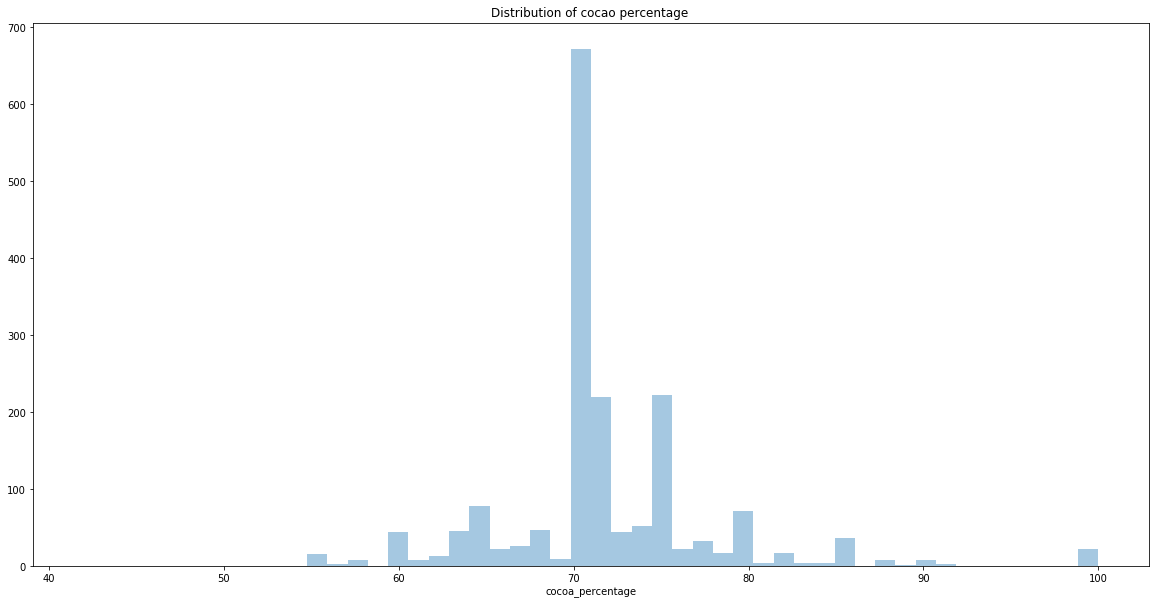

In [27]:
plt.figure(figsize=(20,10))
sns.distplot(data.cocoa_percentage, kde=False)
plt.title("Distribution of cocao percentage ")


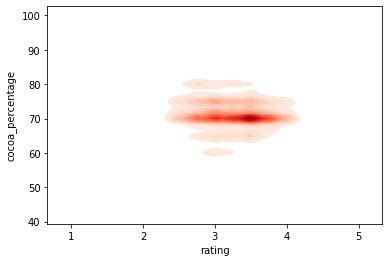

In [29]:
sns.kdeplot(data.rating, data.cocoa_percentage, cmap="Reds", shade=True, n_levels=20,shade_lowest=False)

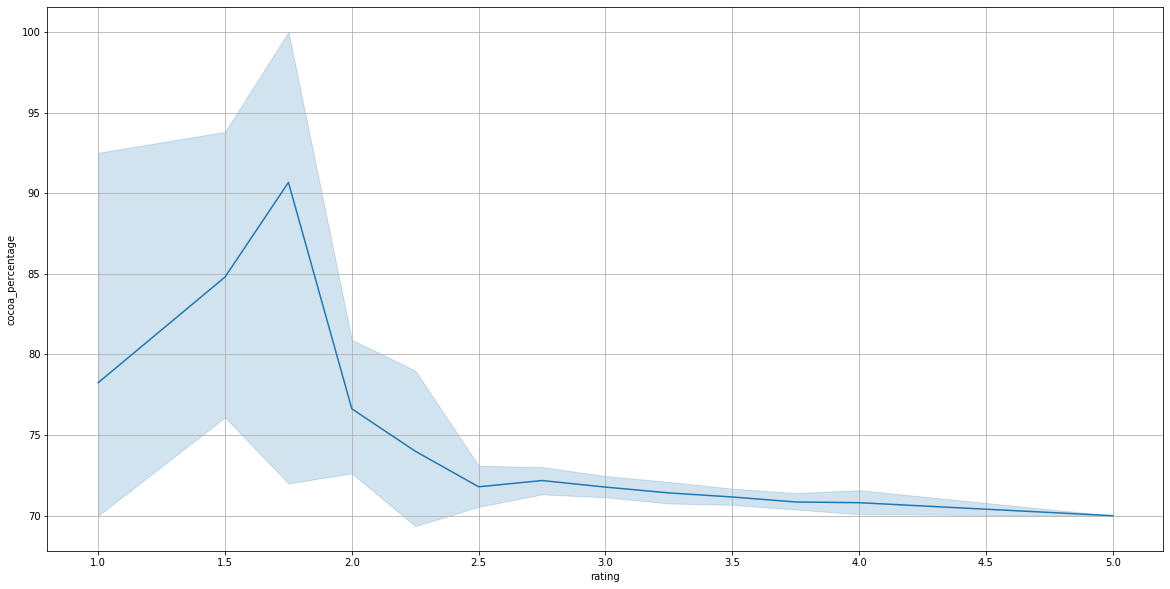

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(x=data.rating, y= data.cocoa_percentage)
plt.grid()

In [18]:
# correlation between cocao_per and rating
correlation = data['rating'].corr(data['cocoa_percentage'])
correlation

-0.16482017762424456

## Train and test split


In [73]:
from sklearn.model_selection import train_test_split
y = data['cocoa_percentage']
X = data[['rating']]
nrow , ncol = data.shape
X_test = X.loc[:np.floor(nrow*0.3)]
X_train = X.loc[np.floor(nrow*0.3):]

# Do the same with the outcome y
# your code here
y_test = y.loc[:np.floor(nrow*0.3)]
y_train = y.loc[np.floor(nrow*0.3):]

//Ham ve 

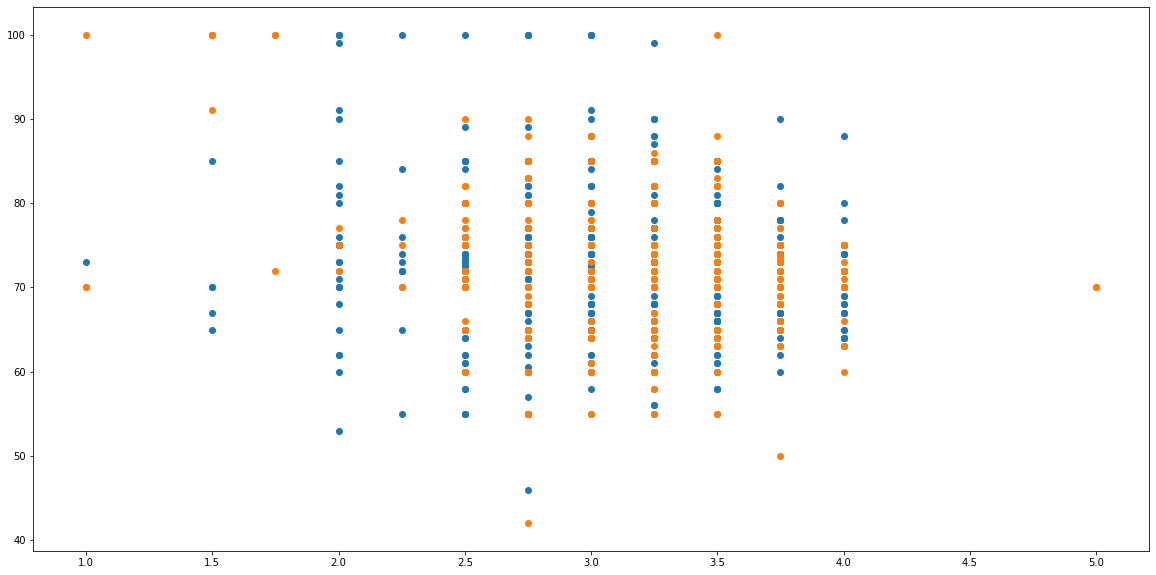

In [77]:
# Let's plot the training set AND test set on a graph using plt.scatter()

plt.figure(figsize=(20, 10))

# Your code here
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

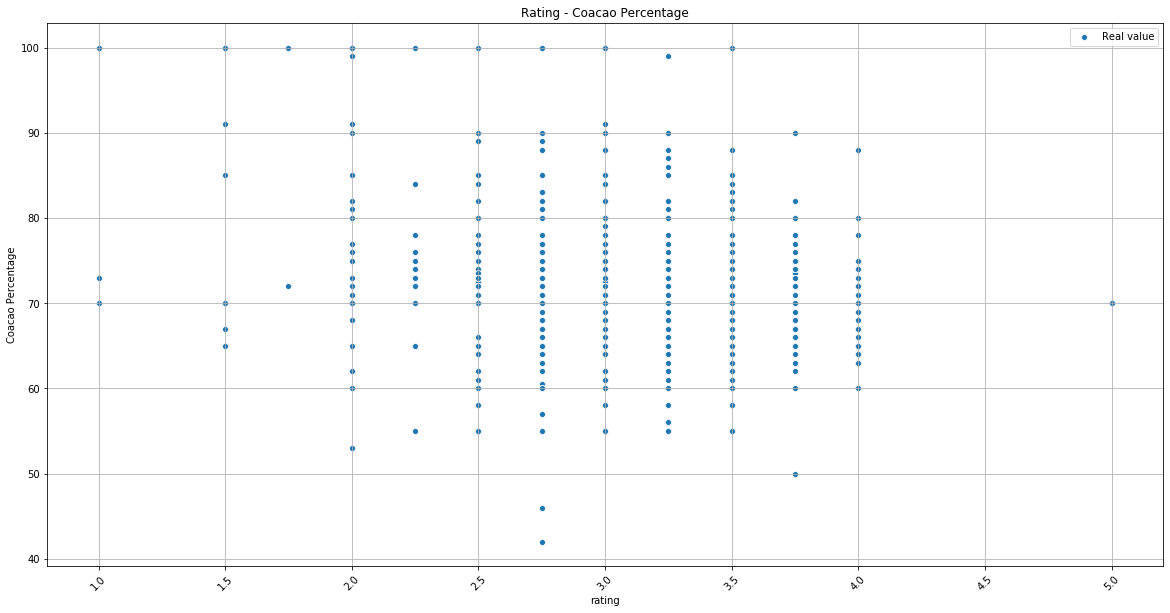

In [60]:
def plot_per(rating, cocoa_per, prediction=None):
    # your code here
    plt.figure(figsize=(20,10))
    plt.xticks(rotation=45)
    sns.scatterplot(rating,cocoa_per,label='Real value')
    if prediction is not None:
         sns.scatterplot(rating,prediction,label='Predicted value')
    plt.ylabel('Coacao Percentage')
    plt.title('Rating - Coacao Percentage')
    plt.grid()
    plt.show()
    
# The result should be the same graph from the previous step
plot_per(data['rating'],data['cocoa_percentage'])

In [74]:
X_train


,rating
538,3.50
539,3.25
540,3.50
541,2.75
542,2.75
...,...
1790,3.75
1791,3.00
1792,3.50
1793,3.25


In [83]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(2)

poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lm = LinearRegression()
lm.fit(X_train_poly, y_train)
y_train_predict = lm.predict(X_train_poly)

y_test_predict = lm.predict(X_test_poly)

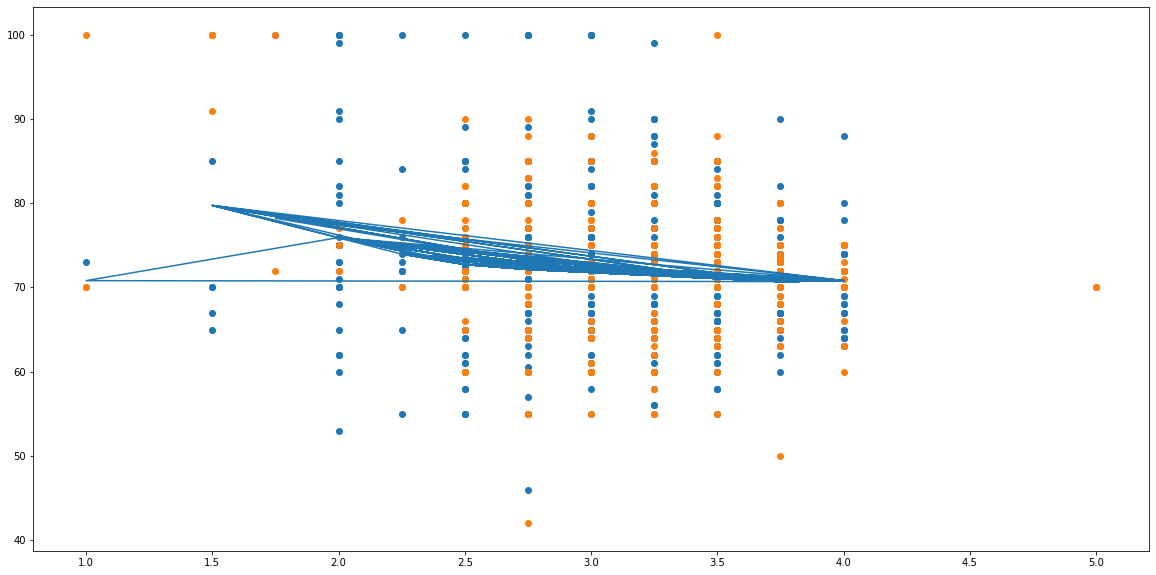

In [82]:
plt.figure(figsize=(20, 10))
plt.plot(X_train, y_train_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()

In [84]:
def plot_poly_linear_regression(degree=10):
    poly_reg = PolynomialFeatures(degree)

    poly_reg.fit(X_train)
    X_train_poly = poly_reg.transform(X_train)
    X_test_poly = poly_reg.transform(X_test)

    lm = LinearRegression()
    lm.fit(X_train_poly, y_train)
    y_train_predict = lm.predict(X_train_poly)

    y_test_predict = lm.predict(X_test_poly)
    
     # calculate the residual errors 
    train_error = np.sqrt(np.mean(np.square(y_train_predict - y_train))) # or sklearn.metrics.mean_squared_error
    test_error = np.sqrt(np.mean(np.square(y_test_predict - y_test)))
                          
    # Visualization
    plt.figure(figsize=(20, 10))
    plt.scatter(X_train, y_train, label='Train')
    plt.scatter(X_test, y_test, label='Test')
    
    X_train_2 = np.linspace(X_train.min(), X_train.max(), 100)
    plt.plot(X_train_2, lm.predict(poly_reg.fit_transform(X_train_2.reshape(-1, 1))), label='Predict')
    plt.title('Train error: {:.3f}\nTest error: {:.3f}\n'.format(train_error, test_error))
    plt.legend(loc="best")
    plt.show()

In [85]:
# This code below uses your function above to demo a interative graph which allows us to tune the parameter 'degree'
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [86]:
p = interactive(plot_poly_linear_regression, degree=(1, 20, 1))
display(p)

interactive(children=(IntSlider(value=10, description='degree', max=20, min=1), Output()), _dom_classes=('widg…